<a href="https://colab.research.google.com/github/hucarlos08/Geo-ML-AT/blob/main/Inference_LLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference

# Local latent variables

The second pattern arises when we need to perform inference in models which have local latent variables, such as hidden states $\mathbf{z}_{1:N}$; we assume the model parameters $\boldsymbol{\theta}$ are known. The joint distribution is given by:

$$
p(\mathbf{x}_{1:N},\mathbf{z}_{1:N}|\boldsymbol{\theta})=\prod_{n=1}^N p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta}_x)p(\mathbf{z}_n|\boldsymbol{\theta}_z)
$$
The idea is calculate:
$$
p(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\theta})
$$

### Utilizing Bayes' Theorem for Full Sequences $\mathbf{x}_{1:N}$ and$\mathbf{z}_{1:N}$
Let's employ Bayes' theorem for the entire sequences$\mathbf{x}_{1:N}$ and$\mathbf{z}_{1:N}$.

The posterior distribution of the latent variables $\mathbf{z}_{1:N}$, given the observations $\mathbf{x}_{1:N}$ and the parameters $\boldsymbol{\theta}$, can be articulated using Bayes' theorem as follows:

$$
p(\mathbf{z}_{1:N}|\mathbf{x}_{1:N},\boldsymbol{\theta}) = \frac{p(\mathbf{x}_{1:N}|\mathbf{z}_{1:N},\boldsymbol{\theta}) \times p(\mathbf{z}_{1:N}|\boldsymbol{\theta})}{p(\mathbf{x}_{1:N}|\boldsymbol{\theta})}
$$

Where:
-$p(\mathbf{z}_{1:N}|\mathbf{x}_{1:N},\boldsymbol{\theta})$ is what we desire to calculate: the posterior distribution of the latent variables given the observations and the model parameters.
  
-$p(\mathbf{x}_{1:N}|\mathbf{z}_{1:N},\boldsymbol{\theta})$ is the likelihood of the observations given the latent variables and the model parameters, and it can be expressed as the product of individual likelihoods (given the conditional independence of the observations given the latent variables and the parameters):
  
$$
p(\mathbf{x}_{1:N}|\mathbf{z}_{1:N},\boldsymbol{\theta}) = \prod_{n=1}^{N} p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta}_x)
$$

-$p(\mathbf{z}_{1:N}|\boldsymbol{\theta})$ is the prior distribution of the latent variables given the model parameters. Depending on the model, this may or may not decompose into a product of individual terms.
  
-$p(\mathbf{x}_{1:N}|\boldsymbol{\theta})$ is the marginal probability of the observations given the model parameters, which can be computed by integrating over all possible configurations of the latent variables:
  
$$
p(\mathbf{x}_{1:N}|\boldsymbol{\theta}) = \int p(\mathbf{x}_{1:N}, \mathbf{z}_{1:N}|\boldsymbol{\theta}) d\mathbf{z}_{1:N}
$$

Handling the entire equation becomes computationally more intricate when dealing with full sequences of observations and latent variables, especially if the latent variables harbor temporal dependencies among themselves. The integral in the denominator, in particular, might be difficult (or even impossible) to compute analytically, depending on the form of the involved distributions.


### Conditional Independence and Bayesian Inference for Latent Variables

Given a set of observations $\mathbf{x}_{1:N}$ and associated latent variables $\mathbf{z}_{1:N}$, under certain conditions, we may assume that the latent variables are conditionally independent given the model parameters $\boldsymbol{\theta}$ and the observations. Formally, the posterior distribution of the latent variables can be factorized as the product of individual posterior distributions:

$$
p(\mathbf{z}_{1:N}|\mathbf{x}_{1:N},\boldsymbol{\theta}) = \prod_{n=1}^{N} p(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\theta})
$$

Each term $p(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\theta})$ can be calculated using Bayes' theorem:

$$
p(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\theta}) = \frac{p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta}) \times p(\mathbf{z}_n|\boldsymbol{\theta})}{p(\mathbf{x}_n|\boldsymbol{\theta})}
$$

Where:
- $p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta})$ is the likelihood of observation $\mathbf{x}_n$ given the latent variable $\mathbf{z}_n$ and parameters $\boldsymbol{\theta}$.
  
- $p(\mathbf{z}_n|\boldsymbol{\theta})$ is the prior distribution of the latent variable $\mathbf{z}_n$ given the parameters $\boldsymbol{\theta}$.

- $p(\mathbf{x}_n|\boldsymbol{\theta})$ is the marginal probability of the observation $\mathbf{x}_n$, which can be computed by integrating (or summing, in the discrete case) the joint probability over all possible configurations of the latent variable $\mathbf{z}_n$:
  
$$
p(\mathbf{x}_n|\boldsymbol{\theta}) = \int p(\mathbf{x}_n, \mathbf{z}_n|\boldsymbol{\theta}) d\mathbf{z}_n
$$

#### Note on $\boldsymbol{\theta}$

It's worth noting that $\boldsymbol{\theta}$ is a composite parameter, encapsulating all the parameters of the model, potentially related to both the observed and latent variables. We might denote it as:

$$
\boldsymbol{\theta} = [\boldsymbol{\theta}_x, \boldsymbol{\theta}_z]
$$

where $\boldsymbol{\theta}_x$ are parameters related to the observed variables $\mathbf{x}$ and $\boldsymbol{\theta}_z$ are parameters related to the latent variables $\mathbf{z}$.

This approach allows us to compute the posterior distribution of each latent variable $\mathbf{z}_n$ independently, significantly simplifying the inference process, especially when dealing with large datasets.


## Gaussian mixture

We say that:

$$
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k N(\mathbf{x} | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

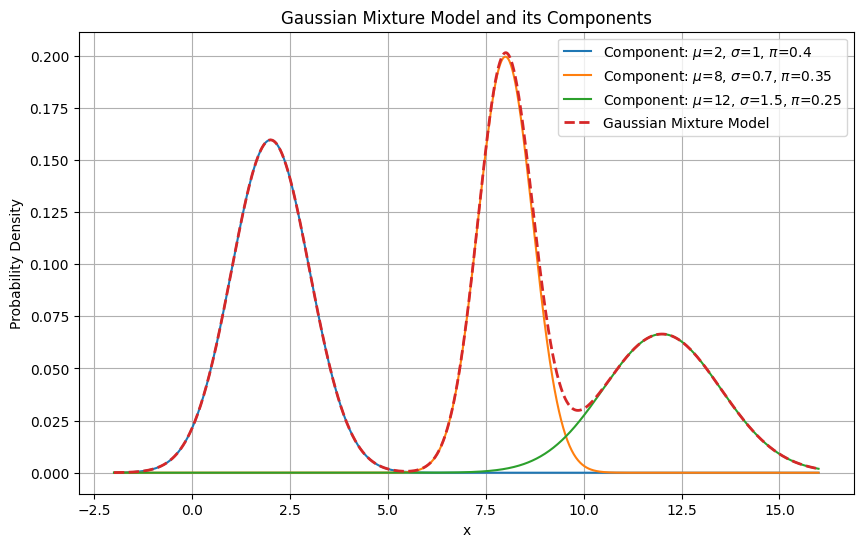

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the Gaussian components
mus = [2, 8, 12]  # Means
sigmas = [1, 0.7, 1.5]  # Standard deviations
pis = [0.4, 0.35, 0.25]  # Mixing coefficients (must sum to 1)

# Generate a Gaussian Mixture Model
x = np.linspace(-2, 16, 1000)
gmm_pdf = np.zeros_like(x)

# Plot each Gaussian component and sum them to obtain the mixture
plt.figure(figsize=(10, 6))
for mu, sigma, pi in zip(mus, sigmas, pis):
    gaussian_pdf = pi * norm.pdf(x, mu, sigma)  # Weighted component
    gmm_pdf += gaussian_pdf  # Summing up the weighted components
    plt.plot(x, gaussian_pdf, label=f'Component: $\mu$={mu}, $\sigma$={sigma}, $\pi$={pi}')

# Plot the resulting Gaussian Mixture Model
plt.plot(x, gmm_pdf, label='Gaussian Mixture Model', linestyle='--', linewidth=2)
plt.title('Gaussian Mixture Model and its Components')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


### Example: Gaussian Mixture Model (GMM)

A Gaussian Mixture Model represents a composite distribution where each observation $\mathbf{x}_n$ is modeled as being drawn from one of $K$ Gaussian distributions. Each of these distributions represents a cluster or a component of the mixture. The probability of an observation $\mathbf{x}_n$ being generated from the $k$-th Gaussian distribution is indicated by the corresponding latent variable $z_{nk}$.

#### Model Formulation

- The latent variable $\mathbf{z}_n$ is a one-hot encoded vector of length $K$ (number of clusters), and each element $z_{nk}$ indicates whether observation $n$ belongs to cluster $k$.

$$
\mathbf{z}_n = [z_{n1}, z_{n2}, \ldots, z_{nK}]
$$

- The parameters $\boldsymbol{\theta}$ encompass the parameters for all the Gaussian distributions ($\mu_k, \Sigma_k$ for each $k$) and the mixing coefficients $\pi_k$ which represent the probability of each cluster.

$$
\boldsymbol{\theta} = \{ \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k, \pi_k \}_{k=1}^{K}
$$

#### Bayesian Formulation

- The likelihood of an observation $\mathbf{x}_n$ given its latent variable $\mathbf{z}_n$ and the parameters $\boldsymbol{\theta}$ can be written as:

$$
p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta}) = \prod_{k=1}^{K} N(\mathbf{x}_n | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)^{z_{nk}}
$$

Where $N(\mathbf{x}_n | \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)$ is the Gaussian distribution with mean $\boldsymbol{\mu}_k$ and covariance $\boldsymbol{\Sigma}_k$.

- The prior distribution of the latent variable $\mathbf{z}_n$ given the mixing coefficients $\boldsymbol{\pi}$ is:

$$
p(\mathbf{z}_n|\boldsymbol{\pi}) = \prod_{k=1}^{K} \pi_k^{z_{nk}}
$$

Using Bayes' theorem, the posterior distribution of the latent variable $\mathbf{z}_n$ given the observation $\mathbf{x}_n$ and the parameters $\boldsymbol{\theta}$ can be computed as:

$$
p(\mathbf{z}_n|\mathbf{x}_n,\boldsymbol{\theta}) = \frac{p(\mathbf{x}_n|\mathbf{z}_n,\boldsymbol{\theta}) \times p(\mathbf{z}_n|\boldsymbol{\pi})}{p(\mathbf{x}_n|\boldsymbol{\theta})}
$$

#### Considerations

In the GMM context, the Expectation-Maximization (EM) algorithm is often used to find the maximum likelihood estimate of the parameters $\boldsymbol{\theta}$, as direct computation via Bayes' theorem involves challenging integrals. The EM algorithm iteratively optimizes the expected log-likelihood, handling the involvement of the latent variables in a computationally efficient manner.


### Bound Optimization (MM) Algorithms

In optimization problems, our objective is often to maximize (or minimize) a certain objective function with respect to its parameters. Let's denote the function to maximize as $l(\theta)$ and the parameters of interest as $\theta$. The fundamental methodology in MM algorithms involves the construction of a surrogate function, $Q(\theta, \theta_t)$, which adheres to the following properties:
- It provides a tight lower bound to the objective function: $Q(\theta, \theta_t) \leq l(\theta)$.
- It is equal to the objective function at the current parameter estimate: $Q(\theta_t, \theta_t) = l(\theta_t)$.

The surrogate function $Q$ is crafted to be computationally more amiable than the original objective function $l$, even though it serves as an approximation. The MM algorithm leverages this surrogate function to iteratively update the parameter estimates and guide the optimization process in a computationally efficient manner.

In each iteration $t$ of the MM algorithm, a new parameter estimate $\theta_{t+1}$ is computed by maximizing the surrogate function with respect to $\theta$, while holding $\theta_t$ fixed. This process ensures that the objective function $l(\theta)$ is non-decreasing with each subsequent iteration, gradually leading the parameters $\theta$ towards a local maximum of the objective function.

The algorithm succinctly consists of two main steps:
1. **Expectation (E-Step):** Formulate the surrogate function $Q(\theta, \theta_t)$ based on the current parameter estimate $\theta_t$.
2. **Maximization (M-Step):** Find $\theta_{t+1}$ by maximizing $Q(\theta, \theta_t)$ with respect to $\theta$.

This iterative procedure is repeated until convergence, which is typically determined by the objective function $l(\theta)$ and parameter estimates $\theta$ stabilizing from one iteration to the next, or until a predefined number of iterations is reached.

### Quadratic Approximation in the MM Algorithm

In the context of the MM (Majorization-Minimization) algorithm, we seek to maximize the log-likelihood function $l(\mu)$ with respect to parameter $\mu$. However, directly maximizing this function can be computationally complex or unstable, so we resort to quadratic approximation to facilitate the optimization.

The log-likelihood function for a sample $\{x_1, x_2, \ldots, x_n\}$ coming from a normal distribution $N(\mu, \sigma^2)$ is given by:

$$
l(\mu) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}} \right)
$$

To facilitate optimization, we construct a quadratic function that approximates $l(\mu)$ in the neighborhood of a current point $\mu_t$. This quadratic approximation, denoted as $Q(\mu, \mu_t)$, is constructed using the second-order Taylor expansion of $l(\mu)$ around $\mu_t$:

$$
Q(\mu, \mu_t) = l(\mu_t) + l'(\mu_t)(\mu - \mu_t) + \frac{1}{2}l''(\mu_t)(\mu - \mu_t)^2
$$

where
- $l'(\mu_t)$ is the first derivative of $l(\mu)$ evaluated at $\mu_t$,
- $l''(\mu_t)$ is the second derivative of $l(\mu)$ evaluated at $\mu_t$.

These derivatives can be computed from the log-likelihood function:

$$
l'(\mu) = \frac{\partial l}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu)
$$

$$
l''(\mu) = \frac{\partial^2 l}{\partial \mu^2} = -\frac{n}{\sigma^2}
$$

The MM algorithm proceeds as follows:
1. **Initialization:** Choose an initial value for $\mu$, denoted $\mu_0$.
2. **Iteration:** For $t = 0, 1, 2, \ldots$ until convergence:
   - **E-step:** Not necessary in this case as we have no latent variables or missing data.
   - **M-step:** Update the estimate of $\mu$ by maximizing the quadratic approximation:
   
     $$
     \mu_{t+1} = \arg\max_\mu Q(\mu, \mu_t)
     $$
     Using the Newton-Raphson method, we can update $\mu_t$ as:

     $$
     \mu_{t+1} = \mu_t - \frac{l'(\mu_t)}{|l''(\mu_t)|}
     $$

This process is repeated until the estimates of $\mu$ converge, which is indicated by insignificant changes in $\mu_t$ between consecutive iterations.

This strategy provides a systematic and numerically stable pathway to maximize the log-likelihood function, especially in situations where the objective function is complex or has multiple parameters.

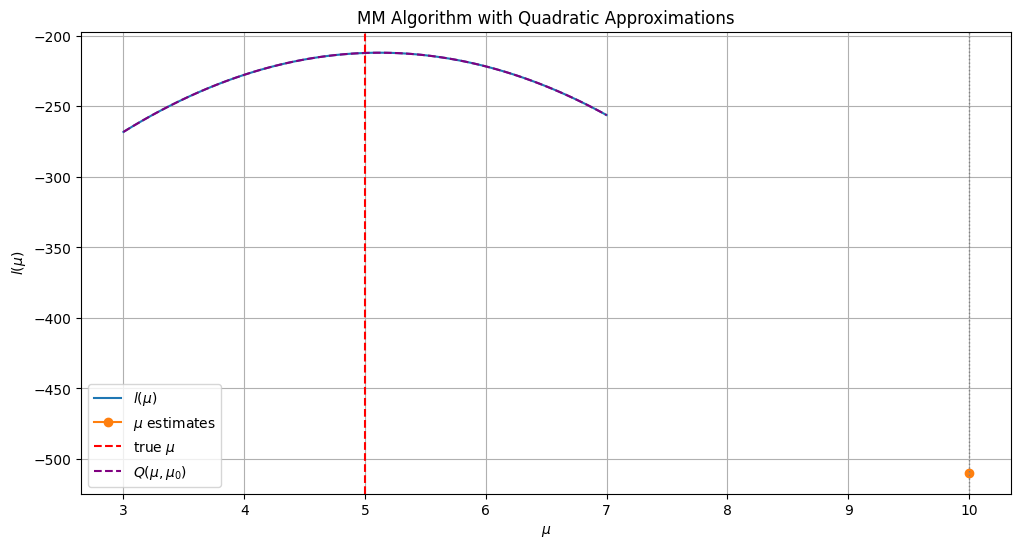

(None, 10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate data
np.random.seed(0)  # for reproducibility
mu_true = 5  # true mean
sigma_true = 2  # true standard deviation
n_samples = 100  # number of samples
data = np.random.normal(loc=mu_true, scale=sigma_true, size=n_samples)

# Define the log-likelihood function
def log_likelihood(mu, data):
    return -np.sum((data - mu)**2) / (2 * sigma_true**2) - len(data) * np.log(sigma_true * np.sqrt(2 * np.pi))


# Define the first and second derivatives of the log-likelihood function
def d_log_likelihood(mu, data):
    return np.sum(data - mu) / sigma_true**2

def dd_log_likelihood(mu, data):
    return -len(data) / sigma_true**2

# Define the quadratic approximation Q(mu, mu_t)
def Q(mu, mu_t, data):
    return (log_likelihood(mu_t, data) +
            d_log_likelihood(mu_t, data) * (mu - mu_t) +
            0.5 * dd_log_likelihood(mu_t, data) * (mu - mu_t)**2)

# Initialize mu
mu_t = 10

# Arrays to store mu and log-likelihood for visualization
mus = [mu_t]
lls = [log_likelihood(mu_t, data)]

# Visualization with quadratic approximations
mu = np.linspace(3, 7, 100)

plt.figure(figsize=(12, 6))
plt.plot(mu, [log_likelihood(m, data) for m in mu], label=r'$l(\mu)$')
plt.plot(mus, lls, 'o-', label=r'$\mu$ estimates')
plt.axvline(mu_true, color='red', linestyle='--', label=r'true $\mu$')

# Plot the quadratic approximations for the first two mu_t's
colors = ['purple', 'orange']
for i, (m, ll) in enumerate(zip(mus, lls)):
    plt.axvline(m, color='gray', linestyle=':', linewidth=1)
    plt.plot([m, m], [min(lls), ll], color='blue', linestyle=':', linewidth=1)
    if i < 2:  # plot for the first two estimates only
        plt.plot(mu, [Q(m, mu_t, data) for m in mu], linestyle='--', color=colors[i],
                 label=r'$Q(\mu, \mu_{' + str(i) + '})$')

plt.title('MM Algorithm with Quadratic Approximations')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$l(\mu)$')
plt.legend()
plt.grid(True)
plt.show(), mus[-1]  # Showing the plot and the final estimate of mu


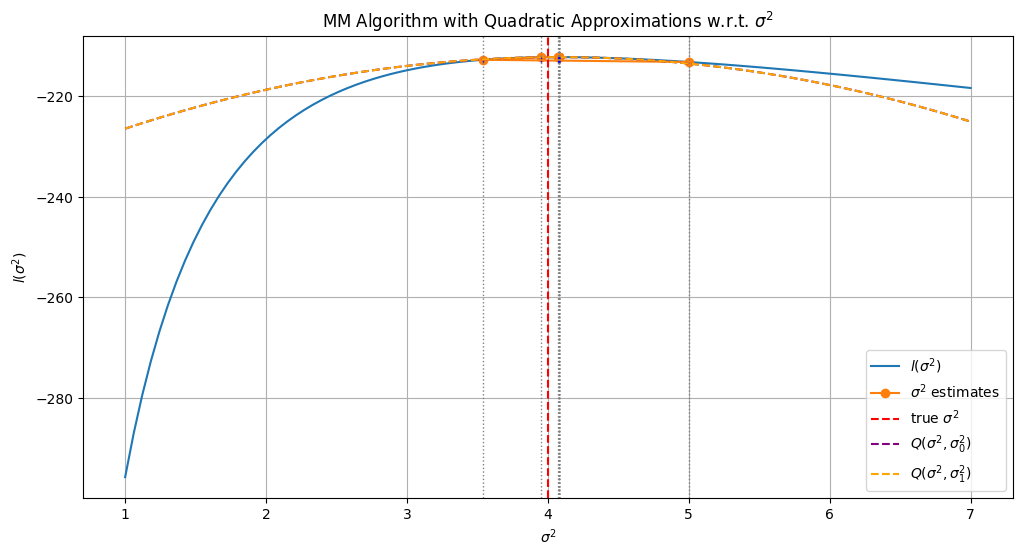

In [ ]:
# Define the log-likelihood function for known mu
def log_likelihood_var(sigma2, data, mu):
    return -len(data) / 2 * np.log(2 * np.pi * sigma2) - np.sum((data - mu)**2) / (2 * sigma2)

# Define the first and second derivatives of the log-likelihood function w.r.t. sigma^2
def d_log_likelihood_var(sigma2, data, mu):
    return -len(data) / (2 * sigma2) + np.sum((data - mu)**2) / (2 * sigma2**2)

def dd_log_likelihood_var(sigma2, data, mu):
    return len(data) / (2 * sigma2**2) - np.sum((data - mu)**2) / (sigma2**3)

# Define the quadratic approximation Q(sigma^2, sigma_t^2)
def Q_var(sigma2, sigma2_t, data, mu):
    return (log_likelihood_var(sigma2_t, data, mu) +
            d_log_likelihood_var(sigma2_t, data, mu) * (sigma2 - sigma2_t) +
            0.5 * dd_log_likelihood_var(sigma2_t, data, mu) * (sigma2 - sigma2_t)**2)

# Initialize sigma2
sigma2_t = 5

# Arrays to store sigma2 and log-likelihood for visualization
sigma2s = [sigma2_t]
lls_var = [log_likelihood_var(sigma2_t, data, mu_true)]

# MM Algorithm: Iteratively maximize the log-likelihood function
max_iter = 10
for _ in range(max_iter):
    # E-step: No E-step is needed here since we have no missing data or latent variables

    # M-step: Maximize the expected log-likelihood
    # Update sigma2 using a Newton-Raphson step
    sigma2_t = sigma2_t - d_log_likelihood_var(sigma2_t, data, mu_true) / dd_log_likelihood_var(sigma2_t, data, mu_true)

    # Store results for visualization
    sigma2s.append(sigma2_t)
    lls_var.append(log_likelihood_var(sigma2_t, data, mu_true))

# Visualization
# Visualization with quadratic approximations
sigma2 = np.linspace(1, 7, 100)
plt.figure(figsize=(12, 6))
plt.plot(sigma2, [log_likelihood_var(s, data, mu_true) for s in sigma2], label=r'$l(\sigma^2)$')
plt.plot(sigma2s, lls_var, 'o-', label=r'$\sigma^2$ estimates')
plt.axvline(sigma_true**2, color='red', linestyle='--', label=r'true $\sigma^2$')

# Plot the quadratic approximations for the first two sigma2_t's
colors = ['purple', 'orange']
for i, (s, ll) in enumerate(zip(sigma2s, lls_var)):
    plt.axvline(s, color='gray', linestyle=':', linewidth=1)
    plt.plot([s, s], [min(lls_var), ll], color='blue', linestyle=':', linewidth=1)
    if i < 2:  # plot for the first two estimates only
        plt.plot(sigma2, [Q_var(s, sigma2_t, data, mu_true) for s in sigma2], linestyle='--', color=colors[i],
                 label=r'$Q(\sigma^2, \sigma_{' + str(i) + '}^2)$')

plt.title('MM Algorithm with Quadratic Approximations w.r.t. $\sigma^2$')
plt.xlabel(r'$\sigma^2$')
plt.ylabel(r'$l(\sigma^2)$')
plt.legend()
plt.grid(True)
plt.show()


### Illustrating Jensen's Inequality with Logarithms

Jensen's Inequality is foundational in probability theory and statistics, offering pivotal insights especially when dealing with logarithmic functions in algorithms like Expectation-Maximization (EM).

If we have a random variable $X$ and a concave function $f$, Jensen's inequality tells us that the $f$ of the expected value of $X$ is always greater than or equal to the expected value of $f(X)$:

$$
f(E[X]) \geq E[f(X)]
$$

When $f$ is the natural logarithm, the inequality becomes:

$$
\log(E[X]) \geq E[\log(X)]
$$

### Illustration with Probabilities

Assuming we have a random variable $X$ that can take on values $x_1, x_2, \ldots, x_n$ with probabilities $p_1, p_2, \ldots, p_n$ respectively, Jensen's inequality for logarithms looks like this:

$$
\log \left( \sum_{i=1}^{n} p_i x_i \right) \geq \sum_{i=1}^{n} p_i \log(x_i)
$$

### Example with Logarithm of Geometric and Arithmetic Mean

For a particular case, where $p_1 = p_2 = \ldots = p_n = \frac{1}{n}$, the inequality simplifies to a form that compares the arithmetic and geometric means:

$$
\log \left( \frac{1}{n} \sum_{i=1}^{n} x_i \right) \geq \frac{1}{n} \sum_{i=1}^{n} \log(x_i)
$$

Exponentiating both sides of the inequality, we obtain:

$$
\frac{1}{n} \sum_{i=1}^{n} x_i \geq \left( \prod_{i=1}^{n} x_i \right)^{1/n}
$$

The left side is the arithmetic mean of $x_1, x_2, \ldots, x_n$ and the right side is the geometric mean of $x_1, x_2, \ldots, x_n$. The inequality states that the arithmetic mean is always greater than or equal to the geometric mean, which is a well-known result in mathematics and is a direct application of Jensen's inequality for logarithms.

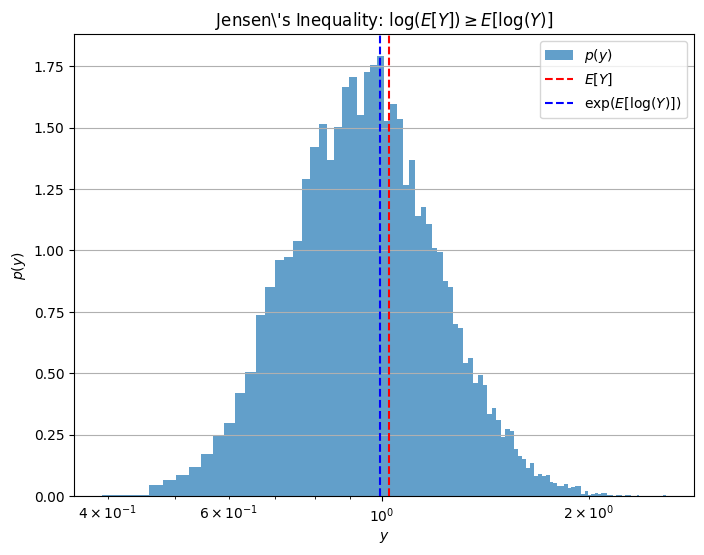

(0.025930499774452127, -0.004608430039566455)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar muestras de una distribución log-normal
np.random.seed(0)  # Para reproducibilidad
samples = np.random.lognormal(mean=0, sigma=0.25, size=10000)

# Calcular log(E[Y]) y E[log(Y)]
log_ey = np.log(np.mean(samples))
e_logy = np.mean(np.log(samples))

# Gráfico
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=100, density=True, alpha=0.7, label=r'$p(y)$')
plt.axvline(x=np.exp(log_ey), color='r', linestyle='--', label=r'$E[Y]$')
plt.axvline(x=np.exp(e_logy), color='b', linestyle='--', label=r'$\exp(E[\log(Y)])$')
plt.xlabel(r'$y$')
plt.ylabel(r'$p(y)$')
plt.title(r'Jensen\'s Inequality: $\log(E[Y]) \geq E[\log(Y)]$')
plt.legend()
plt.grid(axis='y')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.show()

# Mostrar log(E[Y]) y E[log(Y)]
log_ey, e_logy


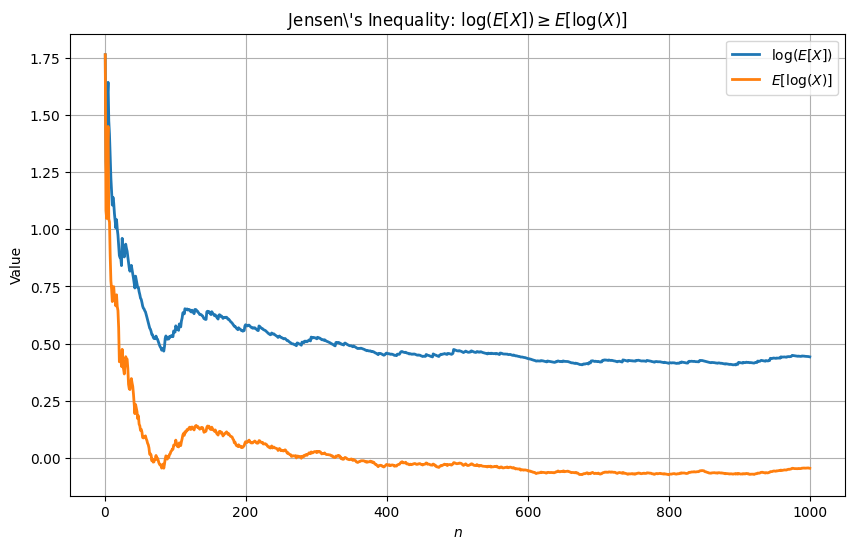

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar muestras de una distribución log-normal
np.random.seed(0)  # Para reproducibilidad
samples = np.random.lognormal(mean=0, sigma=1, size=1000)

# Calcular log(E[X]) y E[log(X)] para diferentes n
n_values = np.arange(1, len(samples) + 1)
log_ex = np.array([np.log(np.mean(samples[:n])) for n in n_values])
e_logx = np.array([np.mean(np.log(samples[:n])) for n in n_values])

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(n_values, log_ex, label=r'$\log(E[X])$', linewidth=2)
plt.plot(n_values, e_logx, label=r'$E[\log(X)]$', linewidth=2)
plt.xlabel(r'$n$')
plt.ylabel(r'Value')
plt.title(r'Jensen\'s Inequality: $\log(E[X]) \geq E[\log(X)]$')
plt.legend()
plt.grid(True)
plt.show()


### Divergence of Kullback-Leibler (DKL)

The Divergence of Kullback-Leibler (DKL) is a measure from information theory that quantifies the divergence between two probability distributions. Given two probability distributions $ P(Z)$ and $ Q(Z)$, the DKL from $ Q$ to $ P$, denoted $ D_{KL}(Q || P)$, is defined as:

$$
D_{KL}(Q || P) = \sum_Z Q(Z) \log \frac{Q(Z)}{P(Z)}
$$

for discrete random variables, or

$$
D_{KL}(Q || P) = \int_Z Q(Z) \log \frac{Q(Z)}{P(Z)} dZ
$$

for continuous random variables. It is important to note that DKL is always non-negative and is equal to zero if and only if $ P$ and $ Q$ are the same distribution.

#### Properties of DKL:
- **Non-negativity:** $ D_{KL}(Q || P) \geq 0$
- **Non-symmetry:** $ D_{KL}(Q || P) \neq D_{KL}(P || Q)$
- **Zero if and only if P equals Q:** $ D_{KL}(Q || P) = 0 \Leftrightarrow P(Z) = Q(Z)$

#### Role in Expectation-Maximization (EM) Algorithm
In the context of the EM algorithm, the DKL arises naturally when forming a lower bound on the log-likelihood. Specifically:

$$
L(\theta; X) = \text{ELBO}(\theta, q) + D_{KL}(q(Z) || P(Z | X, \theta))
$$

Here, $ L(\theta; X)$ is the log-likelihood of the observed data, and ELBO is the evidence lower bound, defined as:

$$
\text{ELBO}(\theta, q) = E_q[\log P(X, Z | \theta)] - E_q[\log q(Z)]
$$

During the E-step of the EM algorithm, we choose $ q(Z)$ to be the true posterior distribution of the latent variables given the observed data, i.e.,

$$
q(Z) = P(Z | X, \theta^{(t)})
$$

This choice minimizes the DKL term to zero (since DKL is zero when $ P$ and $ Q$ are the same), making the ELBO and log-likelihood equal and, therefore, maximizing the ELBO with respect to $ q(Z)$. In the M-step, the parameters $ \theta$ are updated to maximize the ELBO, and indirectly, the log-likelihood.

The utilization of DKL ensures that the algorithm increases the log-likelihood of the observed data in each iteration, converging to a local (or global) maximum, and provides a principled approach to handling latent variable models.

If you have any further questions or need additional explanations, feel free to ask!

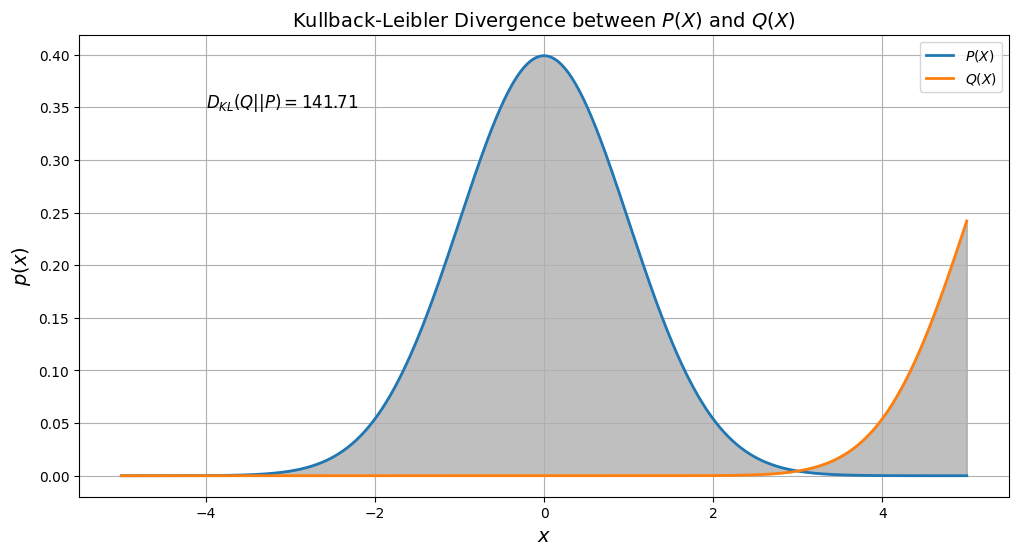

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Parameters for the distributions
mu1, sigma1 = 0, 1  # Mean and standard deviation for distribution P
mu2, sigma2 = 6, 1  # Mean and standard deviation for distribution Q

# Create a range of values
x = np.linspace(-5, 5, 1000)

# Evaluate the probability density functions (pdfs) at points x
p_x = norm.pdf(x, mu1, sigma1)
q_x = norm.pdf(x, mu2, sigma2)

# Calculate the Kullback-Leibler Divergence from Q to P
dkl_qp = np.sum(np.where(p_x != 0, q_x * np.log(q_x / p_x), 0))

# Plot the distributions and the DKL
plt.figure(figsize=(12, 6))
plt.plot(x, p_x, label=r'$P(X)$', linewidth=2)
plt.plot(x, q_x, label=r'$Q(X)$', linewidth=2)
plt.fill_between(x, p_x, q_x, color='gray', alpha=0.5)
plt.text(-4, 0.35, r'$D_{{KL}}(Q||P) = {:.2f}$'.format(dkl_qp), fontsize=12)
plt.title(r'Kullback-Leibler Divergence between $P(X)$ and $Q(X)$', fontsize=14)
plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$p(x)$', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


### Expectation-Maximization (EM) Algorithm

The Expectation-Maximization (EM) algorithm is a powerful statistical method for parameter estimation in models with latent variables. Given a statistical model with observed variables $X$ and latent variables $Z$, both influenced by parameters $\theta$, the EM algorithm iteratively estimates $\theta$ to maximize the likelihood of observing the given data $X$.

#### Objective
The primary goal is to maximize the log-likelihood of the observed data:
$$
L(\theta; X) = \log P(X | \theta)
$$

However, direct maximization of $L(\theta; X)$ can be computationally complex or intractable due to the summation or integration over $Z$ in the likelihood $P(X | \theta)$. The latent variables $Z$ make it challenging to apply traditional optimization methods.

#### The Algorithm
The EM algorithm simplifies this problem by introducing an auxiliary function, known as the Q-function, and then iteratively maximizes this function to estimate the parameters $\theta$. The algorithm consists of two main steps: the Expectation (E) step and the Maximization (M) step.

##### E-Step:
Calculate the expected value of the log-likelihood function of the complete data (observed and latent), given the observed data and the current estimate of the parameters $\theta^{(t)}$. Define the Q-function as follows:

$$
Q(\theta | \theta^{(t)}) = E_{Z|X,\theta^{(t)}} [\log P(X, Z | \theta)]
$$

Where:
- $E_{Z|X,\theta^{(t)}}$ is the expectation taken with respect to the conditional distribution of $Z$ given $X$ and $\theta^{(t)}$.
- $\theta^{(t)}$ is the current estimate of the parameters.

##### M-Step:
Find the parameter values that maximize the expected log-likelihood found in the E-step:
$$
\theta^{(t+1)} = \arg\max_\theta Q(\theta | \theta^{(t)})
$$

##### Iteration:
Repeat the E-step and M-step until the log-likelihood $L(\theta; X)$ converges, or other stopping criteria are met.

#### Mathematical Essence
The EM algorithm leverages the Jensen's inequality and introduces a lower bound for the log-likelihood. The log-likelihood of the observed data can be written as:

$$
L(\theta; X) = \log P(X | \theta) = \log \left( \sum_Z P(X, Z | \theta) \right)
$$

Using Jensen's inequality, a lower bound for the log-likelihood $L(\theta; X)$ is obtained, defined as ELBO ($Evidence \ Lower \ Bound$):

$$
L(\theta; X) = \log P(X | \theta) \geq \sum_Z q(Z) \log \frac{P(X, Z | \theta)}{q(Z)} = ELBO(\theta, q)
$$

Here, $q(Z)$ is a user-defined distribution over the latent variables $Z$, and it's chosen as the posterior distribution of the latent variables given the observed data in the E-step to make the bound tight:
$$
q^{(t+1)}(Z) = P(Z | X, \theta^{(t)})
$$

#### Conclusion
The EM algorithm is widely applied in scenarios where the model depends on unobserved latent variables. Through iteratively estimating the posterior distribution of the latent variables and optimizing the parameters, EM provides a robust approach to maximize the likelihood function, making it a vital tool in statistical modeling and machine learning.

### Expectation-Maximization (EM) for Gaussian Mixture Models (GMM)

Gaussian Mixture Models (GMM) are a type of probabilistic model that assume all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. The mixture of Gaussians can be written as:

$$
P(X|\theta) = \sum_{k=1}^{K} \pi_k {N}(X|\mu_k, \Sigma_k)
$$

where:
- $X$ is the observed data.
- $K$ is the number of Gaussian distributions.
- $\pi_k$ is the mixing coefficient of the k-th Gaussian distribution, with the constraint $\sum_{k=1}^{K} \pi_k = 1$.
- $\mu_k$ and $\Sigma_k$ are the mean and covariance matrix of the k-th Gaussian distribution, respectively.
- $\theta$ represents all the parameters of the model ($\pi, \mu, \Sigma$).

The challenge in GMM is to estimate the parameters $\theta$ (i.e., $\pi_k, \mu_k, \Sigma_k$) given the observed data $X$. Here, the EM algorithm comes into play by providing a systematic framework to estimate these parameters.

#### E-Step:

In the E-step, we calculate the expected value of the latent variables given the observed data and the current parameter estimates. For GMM, the latent variables are the responsibilities $r_{ik}$, which indicate the probability that data point $i$ was generated by Gaussian $k$. These are computed as:

$$
r_{ik} = \frac{\pi_k {N}(x_i|\mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j {N}(x_i|\mu_j, \Sigma_j)}
$$

#### M-Step:

In the M-step, the model parameters $\theta$ are re-estimated by maximizing the expected log-likelihood obtained from the E-step. The parameters for each Gaussian component are updated as follows:

1. **Means**:
$$
\mu_k^{(t+1)} = \frac{\sum_{i=1}^{N} r_{ik} x_i}{N_k}
$$

2. **Covariances**:
$$
\Sigma_k^{(t+1)} = \frac{\sum_{i=1}^{N} r_{ik} (x_i - \mu_k^{(t+1)})(x_i - \mu_k^{(t+1)})^T}{N_k}
$$

3. **Mixing Coefficients**:
$$
\pi_k^{(t+1)} = \frac{N_k}{N}
$$

where
$$
N_k = \sum_{i=1}^{N} r_{ik}
$$
and $N$ is the total number of data points.

#### Iteration:

Repeat the E-step and M-step until the parameters $\theta$ converge, or until a predefined number of iterations is reached.

#### Implementation:

- **Initialization**: Parameters $\theta$ can be initialized randomly, or a simpler clustering algorithm (like K-Means) can be used for initialization.
  
- **E-Step**: Compute the responsibilities $r_{ik}$ using the current parameter estimates.

- **M-Step**: Update the parameters $\theta$ using the computed responsibilities.

- **Convergence Check**: Repeat the E-step and M-step until the change in log-likelihood $L(\theta; X)$ is smaller than a predefined threshold or a maximum number of iterations is reached.

#### Final Notes:

- GMM fitted with EM is sensitive to the initialization of the parameters.
- EM guarantees the increase of the likelihood function but does not guarantee finding the global maximum.
- The number of components $K$ is typically selected using model selection criteria like the Bayesian Information Criterion (BIC).

The EM algorithm for GMM efficiently estimates the model parameters when the data is thought to be generated from a mixture of several Gaussian distributions. It has been widely used in various fields including image processing, bioinformatics, and finance due to its flexibility in capturing different data distributions.

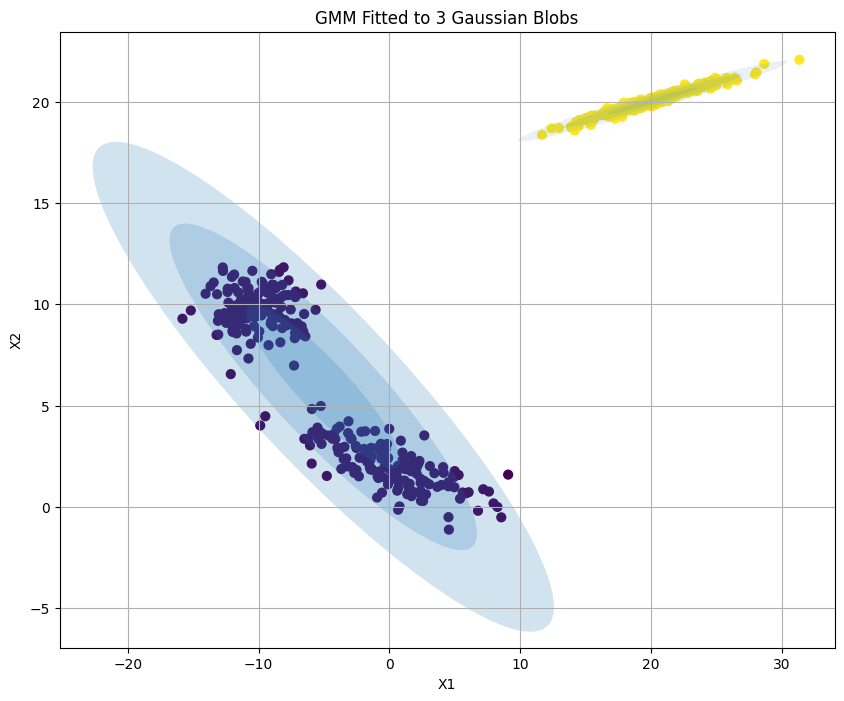

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Function to draw an ellipse based on mean and covariance
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle=angle, **kwargs))

# Generate synthetic data: 3 Gaussian blobs
np.random.seed(15)  # for reproducibility
n_samples = 150

C1 = np.array([[0.0, -0.9], [3.5, -.9]])
C2 = np.array([[0.7, 0.0], [3.5, .7]])
C3 = np.array([[-2., 0.], [0., 1.]])

# Generating data points
X = np.vstack((np.dot(np.random.randn(n_samples, 2), C1) + np.array([0, 2]),
               np.dot(np.random.randn(n_samples, 2), C2) + np.array([20, 20]),
               np.dot(np.random.randn(n_samples, 2), C3) + np.array([-10, 10])))

# Fit a Gaussian mixture with EM
gmm = GaussianMixture(n_components=2, covariance_type='full').fit(X)



# Obtain cluster assignments for each data point
labels = gmm.predict(X)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, cmap='viridis')

# Plot ellipses for each component
w_factor = 0.2 / gmm.weights_.max()
for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
    draw_ellipse(pos, covar, alpha=w * w_factor)

plt.title('GMM Fitted to 3 Gaussian Blobs')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()
